In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

## Read in Data

In [33]:
# this df includes chem class, smiles, and the image label for the molecular images
images = pd.read_csv("../data/3cls_rmsaltol.csv") 

# this df includes all chemical properties and smiles for the chemicals
chems = pd.read_csv("../data/CID_properties.csv")

## update chemical columns
chems.columns = chems.columns.str.lower()
chems.rename({"isomericsmiles": "smiles"}, inplace = True, axis = 1 )

#### Merge data frames

Merging dataframes together so that I can have a reference of the chemical properties and molecular structure together.

In [39]:
# merge dataframes
df = pd.merge(images, chems)

# now I have duplicate drug class columns, so I will remove one
df.drop(columns = "class", inplace = True)

In [40]:
# Only 67 rows overlapped
df.shape

(67, 8)

In [42]:
df["drug_class"].value_counts()

cardio            28
antineoplastic    21
cns               18
Name: drug_class, dtype: int64

In [43]:
df.head()

,pngpath,smiles,cid,featurehydrophobecount3d,hbondacceptorcount,hbonddonorcount,molecularweight,drug_class
0,cns/33,C1CC1,6351,0.0,0,0,42.081,cns
1,cns/142,CCCC(CCC)C(=O)O,3121,3.0,2,1,144.214,cns
2,cns/208,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,1,0.0,4,0,203.238,cns
3,cns/213,CC(=O)NCCCS(=O)(=O)O,71158,0.0,4,2,181.206,cns
4,cns/261,CCCC(CCC)C(=O)[O-],3549980,3.0,2,0,143.206,cns


# EDA

Explore the molecular weights by drug class

In [ ]:
sns.kdeplot(df["molecularweight"])
sns.kdeplot(d, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

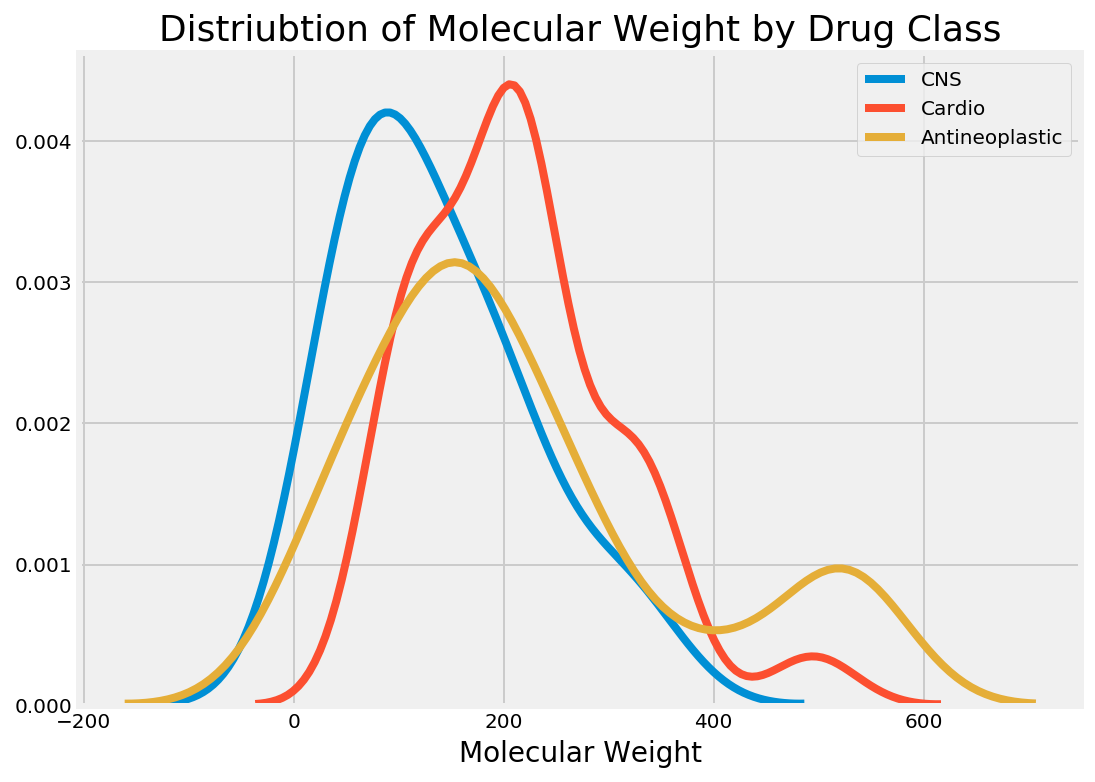

In [59]:
plt.figure(figsize = (8, 6))
sns.kdeplot(df.loc[df["drug_class"] == "cns"]["molecularweight"], label = "CNS");
sns.kdeplot(df.loc[df["drug_class"] == "cardio"]["molecularweight"], label = "Cardio")
sns.kdeplot(df.loc[df["drug_class"] == "antineoplastic"]["molecularweight"], label = "Antineoplastic")
plt.title("Distriubtion of Molecular Weight by Drug Class", fontsize = 18)
plt.xlabel("Molecular Weight", fontsize = 14)
plt.savefig();